In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = 'amz_uk_price_prediction_dataset.csv'
df = pd.read_csv(url)
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


## Part 1: Understanding Product Categories

### Business Question: : What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

### Frequency Tables:

In [43]:
#Generate a frequency table for the product category.
category_freq = df['category'].value_counts()

#Which are the top 5 most listed product categories?
category_freq = category_freq.head(3)
category_freq

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Name: count, dtype: int64

### Visualizations

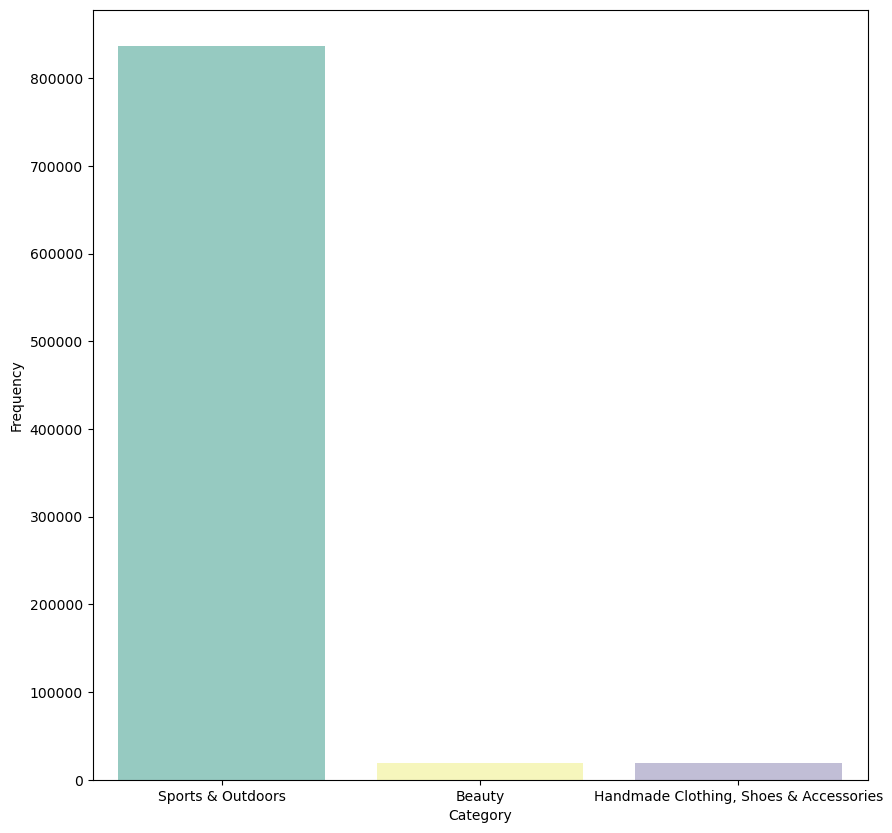

<Axes: ylabel='count'>

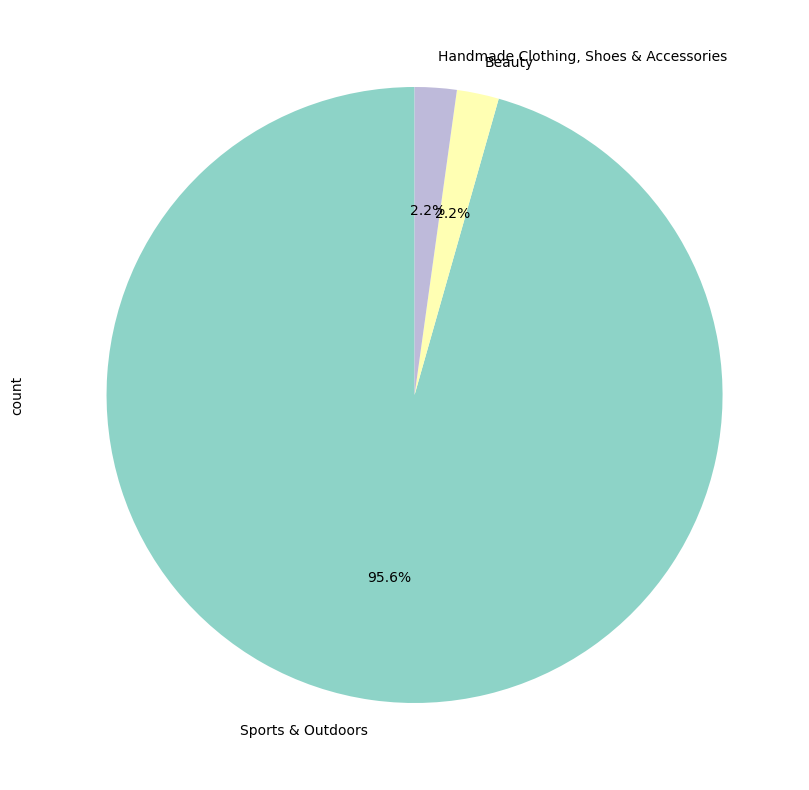

In [58]:
#Display the distribution of products across different categories using a bar chart. 
#If you face problems understanding the chart, do it for a subset of top categories.

fig, axes = plt.subplots(figsize=(10,10))
sns.barplot(x=category_freq.index,y=category_freq.values, palette='Set3',hue=category_freq.index,legend=False)
axes.set_ylabel('Frequency')
axes.set_xlabel('Category')
plt.show()

# For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?
# df['MSZoning'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

fig, ax = plt.subplots(figsize=(10,10))
category_freq.plot.pie(autopct='%1.1f%%',startangle=90,colors=sns.color_palette('Set3'), ax=ax)


## Part 2: Delving into product pricing

### Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

### 1. Measures of Centrality

In [70]:
# Calculate the mean, median, and mode for the price of products.

mean_price = df['price'].mean().round(2)
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

display(mean_price,median_price,mode_price)

#What's the average price point of products listed? How does this compare with the most common price point (mode)?

#The average price point of products is 89.24 and the mode is 9.99 which reveals that the prices are positively skewed
#with outliers interfering in the computation of the most common price in this dataset.

(89.24, 19.09, 9.99)

## 2. Measures of Dispersion

In [87]:
# Determine the variance, standard deviation, range, and interquartile range for product price.

var_price = round(df['price'].var(),2)
std_price = round(df['price'].std(),2)
min_price = df['price'].min()
max_price = df['price'].max()
range_price = max_price - min_price
quartile_price = df['price'].quantile([0.25, 0.5, 0.75])
kurtosis_price = round(df['price'].kurtosis(),2)

display(var_price,std_price,range_price,quartile_price,kurtosis_price)

#How varied are the product prices? Are there any indicators of a significant spread in prices?

#This shows a high kurtosis and confirms that there is a wide spread in prices with heavy tails. Also, 75% of the values fall on or below 9.99 price
#which is the same as the mode.

119445.49

345.61

100000.0

0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64

4241.62

### 3. Visualizations

<Axes: xlabel='price', ylabel='Count'>

<Axes: xlabel='price', ylabel='Count'>

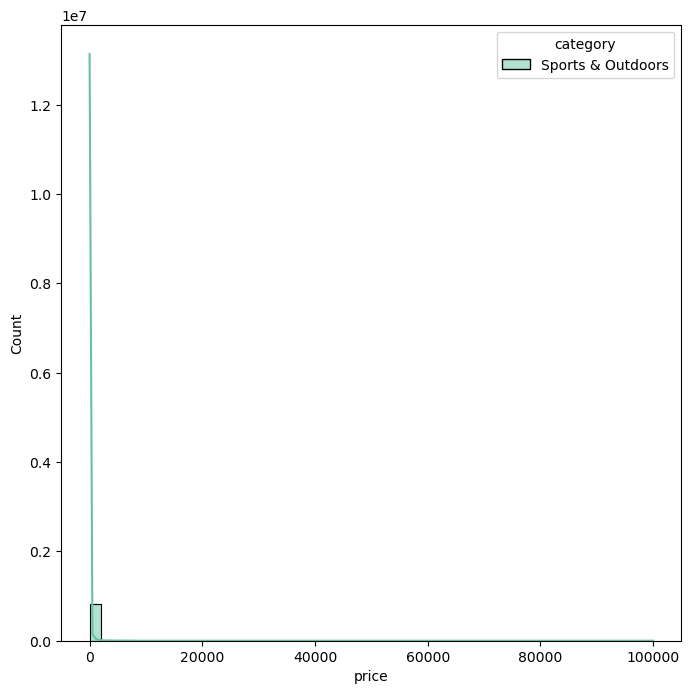

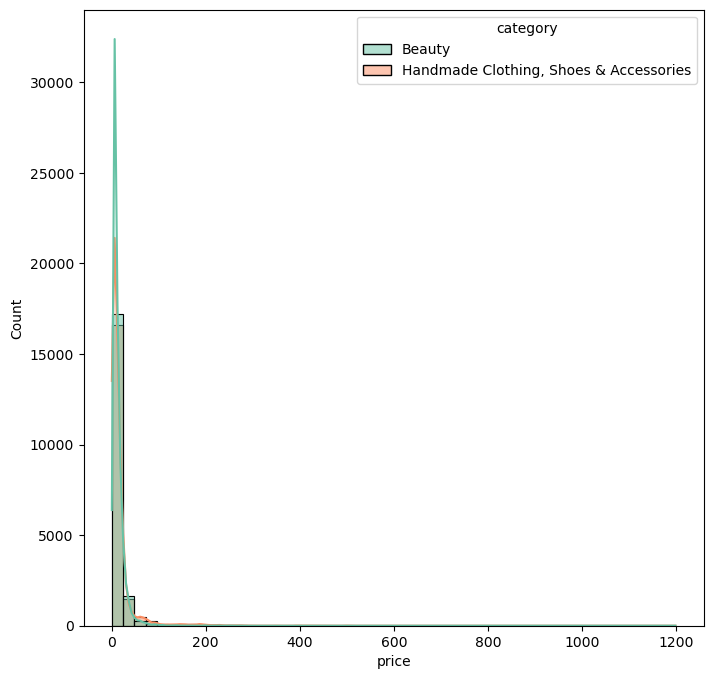

In [202]:
# Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. 
#If its hard to read these diagrams, think why this is, and explain how it could be solved.


#It's better to see these by category instead of all of the prices together.

fig, axes = plt.subplots(figsize=(8,8))
sports_outdoors_df = df[df['category'].isin(list([category_freq.index[0]]))]
sports_outdoors = sns.histplot(data=sports_outdoors_df, x='price',hue='category',kde=True,bins=50,palette='Set2', ax=axes)
display(sports_outdoors)

fig, axes = plt.subplots(figsize=(8,8))
beauty_df = df[df['category'].isin(category_freq.index[1:3])]
beauty = sns.histplot(data=beauty_df, x='price',hue='category',kde=True,bins=50,palette='Set2', ax=axes)
display(beauty)
#Most of the products fall into the Sports & Outdoors category so it makes it hard to read when compared to the other categories

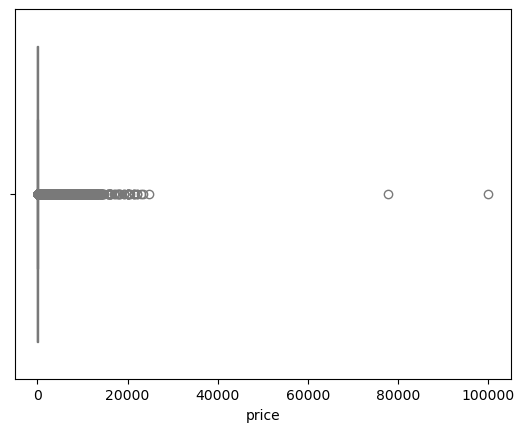

In [205]:
#Are there products that are priced significantly higher than the rest? 
#Use a box plot to showcase the spread and potential outliers in product pricing.

sns.boxplot(x = df['price'], color="lightblue");
#Yes, there is products priced a lot higher than the rest. See below.

## Part 3: Unpacking Product Ratings

### Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

#### 1. Measures of Centrality

In [214]:
#Calculate the mean, median, and mode for the rating of products.

mean_rating = df['stars'].mean().round(2)
median_rating = df['stars'].median()
mode_rating = df['stars'].mode()[0]

mean_rating,median_rating,mode_rating

#How do customers generally rate products? Is there a common trend?

#It seems that normally the products are rated at 0, the median and mode offer a good measure to understand the trend since
#there is many outliers for the mean.

(2.15, 0.0, 0.0)

### 2. Measures of Dispersion

In [227]:
# Determine the variance, standard deviation, and interquartile range for product rating.

var_rating = round(df['stars'].var(),2)
std_rating = round(df['stars'].std(),2)
interquartile_rating =  df['stars'].quantile([0.25, 0.5, 0.75])

var_rating, std_rating, interquartile_rating

#Are the ratings consistent, or is there a wide variation in customer feedback?

#The ratings are consistent in which 75% of the customers tend to leave a 0 stars review and only 25% leave 4.4 or higher.
#An assumption could be that rating 0 just means that the customer didn't rate it for the most part.

(4.82,
 2.19,
 0.25    0.0
 0.50    0.0
 0.75    4.4
 Name: stars, dtype: float64)

### 3. Shape of the Distribution:

In [233]:
#Calculate the skewness and kurtosis for the rating column.

skewness_rating = df['stars'].skew()
kurtosis_rating = df['stars'].kurtosis()

skewness_rating,kurtosis_rating

# Are the ratings normally distributed, or do they lean towards higher or lower values?

#The ratings are almost a normal distribution with the skewness very close to zero and likewise for the kurtosis.

(0.08120735761080985, -1.9260061280432985)

### 4. Visualizations

<Axes: xlabel='stars', ylabel='Count'>

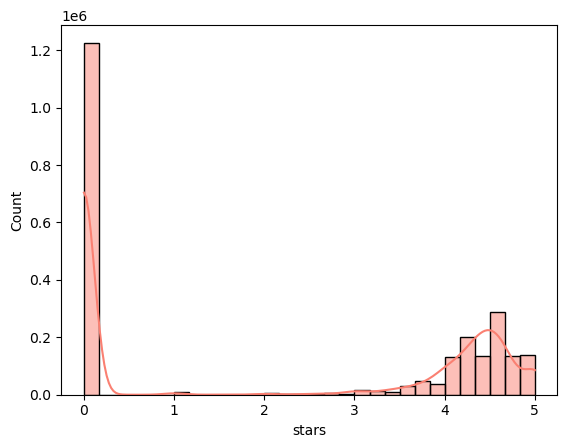

In [239]:
#Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

sns.histplot(df['stars'], kde=True, bins=30, color="salmon")

#The most common rating seems to be zero and the outliers are anything above a 3 start rating.


<Axes: xlabel='stars', ylabel='Count'>

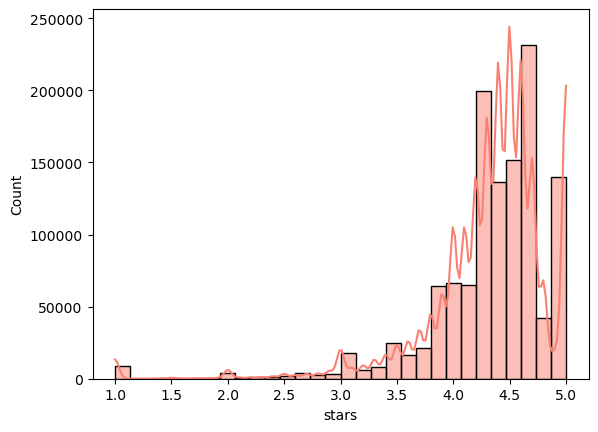

In [241]:
#Interesting enough, if we were to take out the zero stars we would have a more normal distribution.
df_3 = df[df['stars'] != 0]
sns.histplot(df_3['stars'], kde=True, bins=30, color="salmon")